In [1]:
!{sys.executable} -m pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 한글 폰트 설정 (한국어 환경용)
plt.rcParams['font.family'] = 'Nanumgothic'
plt.rcParams['axes.unicode_minus'] = False

zsh:1: parse error near `-m'


In [2]:
# 전체 위생데이터 중 카페만 추출
df_clean = pd.read_csv("/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/위생등급.csv", index_col=0)

def analyze_hygiene_by_brand(df, brands):
    result = {}
    for brand in brands:
        brand_df = df_clean[df_clean['업소명'].str.contains(brand, na=False)]
        grade_counts = brand_df['지정등급'].value_counts()
        result[brand] = grade_counts.to_dict()
    result_df = pd.DataFrame(result).fillna(0).astype(int).T
    return result_df

brands = ["메가", "컴포즈", "이디야", "투썸", "할리스"]

result_df = analyze_hygiene_by_brand(df_clean, brands)

result_df = result_df.reset_index()
result_df = result_df.rename(columns={'index': '브랜드명',    
    '매우우수': '위생등급매우우수개수',
    '우수': '위생등급우수개수',
    '좋음': '위생등급좋음개수',
})
result_df['브랜드명'] = result_df['브랜드명'].replace({'메가': '메가커피', '투썸': '투썸플레이스'})
result_df['위생등급총개수'] = result_df[['위생등급매우우수개수', '위생등급우수개수', '위생등급좋음개수']].sum(axis=1)

print(result_df)

     브랜드명  위생등급매우우수개수  위생등급우수개수  위생등급좋음개수  위생등급총개수
0    메가커피          82        13         2       97
1     컴포즈         136        20         1      157
2     이디야        1716       145        26     1887
3  투썸플레이스         862        12         2      876
4     할리스         318         3         1      322


In [3]:
# 통합 데이터
file_path = r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/통합데이터.csv"

df = pd.read_csv(file_path)

# 콤마 제거 및 수치 변환
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

# 단위 변환 (백만원 단위로 통일)
money_cols = ['평균매출액(원)', '면적당평균매출액(원)', '사업자부담금(원)', '면적당인테리어비용(원)']
for col in money_cols:
    df[col]=df[col] / 1_000_000

# 팔로워=만명 단위로 변환
df['팔로워(명)'] = df['팔로워(명)'] / 10_000

# 컬럼명 변환
df.rename(columns={
    'Unnamed: 0' :'브랜드명',
    '평균매출액(원)': '평균매출액(백만원)',
    '면적당평균매출액(원)': '면적당평균매출액(백만원)',
    '사업자부담금(원)': '사업자부담금(백만원)',
    '면적당인테리어비용(원)': '면적당인테리어비용(백만원)',
    '팔로워(명)': '팔로워(만명)'
}, inplace=True)

df['브랜드명'] = df['브랜드명'].replace({'메가': '메가커피', '투썸': '투썸플레이스'})

print(df.head())

     브랜드명    가맹점수  평균매출액(백만원)  면적당평균매출액(백만원)  사업자부담금(백만원)  면적당인테리어비용(백만원)  \
0    메가커피  2681.0     362.621         20.908       74.226           1.540   
1     컴포즈  2360.0     265.013         26.002       95.232           1.600   
2     이디야  2805.0     195.287          6.447      127.890           2.090   
3  투썸플레이스  1484.0     522.117          8.949      309.800           2.187   
4     할리스   424.0     344.268          5.849      261.000           2.000   

   팔로워(만명)  
0      4.7  
1     12.3  
2     21.4  
3     32.7  
4      6.5  


In [4]:
# 위생 데이터와 통합 데이터 병합
df = pd.merge(df, result_df, on='브랜드명', how='left')
print(df)

# 결측치 확인
print(f"\n결측치 총 개수: {df.isnull().sum().sum()}")

print("\n기술 통계량:")
df.describe().round(1).T

     브랜드명    가맹점수  평균매출액(백만원)  면적당평균매출액(백만원)  사업자부담금(백만원)  면적당인테리어비용(백만원)  \
0    메가커피  2681.0     362.621         20.908       74.226           1.540   
1     컴포즈  2360.0     265.013         26.002       95.232           1.600   
2     이디야  2805.0     195.287          6.447      127.890           2.090   
3  투썸플레이스  1484.0     522.117          8.949      309.800           2.187   
4     할리스   424.0     344.268          5.849      261.000           2.000   

   팔로워(만명)  위생등급매우우수개수  위생등급우수개수  위생등급좋음개수  위생등급총개수  
0      4.7          82        13         2       97  
1     12.3         136        20         1      157  
2     21.4        1716       145        26     1887  
3     32.7         862        12         2      876  
4      6.5         318         3         1      322  

결측치 총 개수: 0

기술 통계량:


,count,mean,std,min,25%,50%,75%,max
가맹점수,5.0,1950.8,997.4,424.0,1484.0,2360.0,2681.0,2805.0
평균매출액(백만원),5.0,337.9,122.7,195.3,265.0,344.3,362.6,522.1
면적당평균매출액(백만원),5.0,13.6,9.2,5.8,6.4,8.9,20.9,26.0
사업자부담금(백만원),5.0,173.6,105.2,74.2,95.2,127.9,261.0,309.8
면적당인테리어비용(백만원),5.0,1.9,0.3,1.5,1.6,2.0,2.1,2.2
팔로워(만명),5.0,15.5,11.6,4.7,6.5,12.3,21.4,32.7
위생등급매우우수개수,5.0,622.8,684.6,82.0,136.0,318.0,862.0,1716.0
위생등급우수개수,5.0,38.6,59.8,3.0,12.0,13.0,20.0,145.0
위생등급좋음개수,5.0,6.4,11.0,1.0,1.0,2.0,2.0,26.0
위생등급총개수,5.0,667.8,747.7,97.0,157.0,322.0,876.0,1887.0


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 예시 (맥 용)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf" 

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

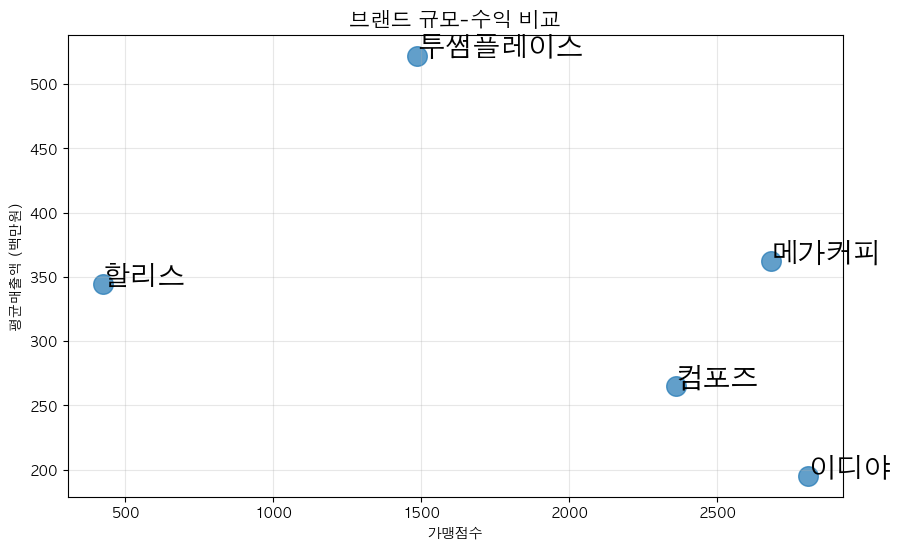

In [16]:
# 브랜드별 가맹점수 & 평균매출액 비교 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['가맹점수'], df['평균매출액(백만원)'], s=200, alpha=0.7)

for i in range(len(df)):
    x = df.loc[i, '가맹점수']
    y = df.loc[i, '평균매출액(백만원)']
    label = df.loc[i, '브랜드명']
    plt.text(x, y, label, fontsize=20)

plt.title("브랜드 규모-수익 비교", fontsize=15)
plt.xlabel("가맹점수")
plt.ylabel("평균매출액 (백만원)")
plt.grid(True, alpha=0.3)
plt.show()

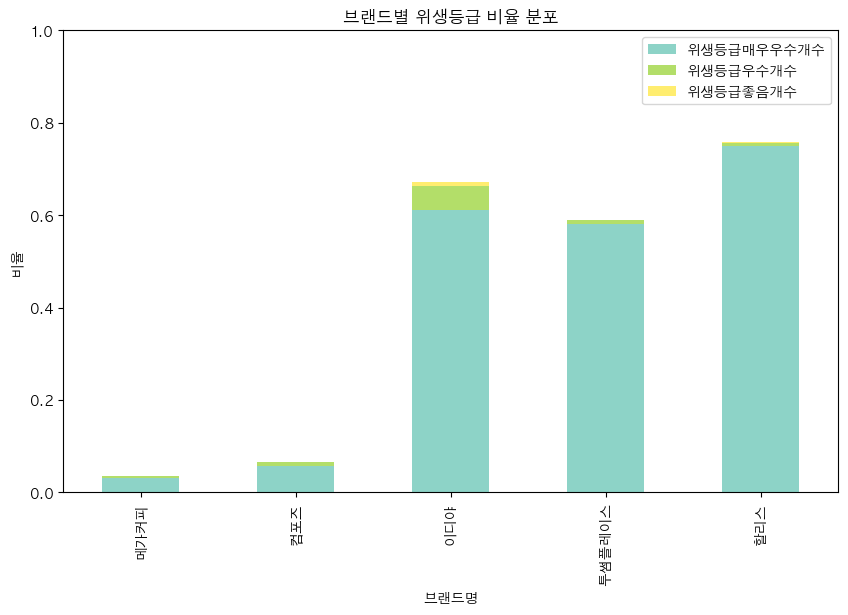

In [7]:
# 위생등급 개수를 가맹점 수로 나눈 비율 계산
df_ratio = df.set_index('브랜드명')[['위생등급매우우수개수','위생등급우수개수','위생등급좋음개수']].div(df.set_index('브랜드명')['가맹점수'], axis=0)

# 비율 스택 바 차트로 시각화
df_ratio.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title("브랜드별 위생등급 비율 분포")
plt.ylabel("비율")
plt.ylim(0, 1)  # 비율이니까 0~1 사이
plt.show()


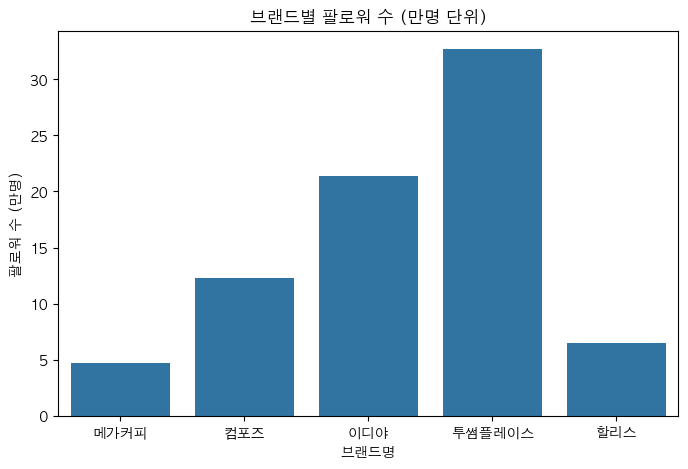

In [8]:
# 브랜드 파워 지표 (팔로워) 
import seaborn as sns

# 팔로워 수 비교
plt.figure(figsize=(8,5))
sns.barplot(x='브랜드명', y='팔로워(만명)', data=df)
plt.title("브랜드별 팔로워 수 (만명 단위)")
plt.ylabel("팔로워 수 (만명)")
plt.show()

In [9]:
# 지역별 카페 분포
file_path = r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/매장분포.csv"

df_korea = pd.read_csv(file_path, index_col=0)
df_korea = df_korea.T
df_korea.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
메가커피,639,92,41,245,115,67,11,16,893,85,82,87,57,88,55,70,38
컴포즈,410,266,48,218,140,39,44,5,595,75,32,54,31,57,73,239,35
이디야,592,150,105,176,74,59,92,20,726,139,99,97,102,88,129,138,19
투썸플레이스,277,77,96,98,48,65,33,15,366,60,51,58,43,46,65,65,21
할리스,88,22,20,16,12,17,12,4,100,15,17,21,31,12,14,20,3


<Figure size 1500x800 with 0 Axes>

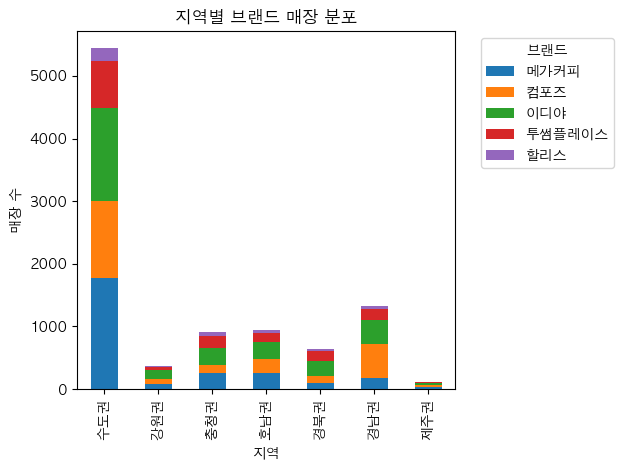

In [10]:
regions = {
    '수도권': ['서울', '경기', '인천'],
    '강원권': ['강원'],
    '충청권': ['대전', '충북', '충남', '세종'],
    '호남권': ['광주', '전북', '전남'],
    '경북권': ['대구', '경북'],
    '경남권': ['부산', '울산', '경남'],
    '제주권': ['제주']
}

# 권역별 합치기
for region, columns in regions.items():
    df_korea[region] = df_korea[columns].sum(axis=1)

# 기존 지역 컬럼은 필요 없으면 삭제
remove_columns = sum(regions.values(), [])
df_korea = df_korea.drop(columns=remove_columns)

plt.figure(figsize=(15,8))
df_korea.T.plot(kind='bar', stacked=True)
plt.title('지역별 브랜드 매장 분포')
plt.xlabel('지역')
plt.ylabel('매장 수')
plt.legend(title='브랜드', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# 수익성 분석용 주요 지표 추출
profit_df = df[['브랜드명', '평균매출액(백만원)', '면적당평균매출액(백만원)', '사업자부담금(백만원)']].copy()

print("===== 수익성 관련 요약 통계 =====")
display(profit_df.describe().round(2))

print("===== 브랜드별 수익성 비교 =====")
display(profit_df.sort_values(by='평균매출액(백만원)', ascending=False))

===== 수익성 관련 요약 통계 =====


,평균매출액(백만원),면적당평균매출액(백만원),사업자부담금(백만원)
count,5.00,5.00,5.00
mean,337.86,13.63,173.63
std,122.72,9.22,105.23
min,195.29,5.85,74.23
25%,265.01,6.45,95.23
50%,344.27,8.95,127.89
75%,362.62,20.91,261.00
max,522.12,26.00,309.80


===== 브랜드별 수익성 비교 =====


,브랜드명,평균매출액(백만원),면적당평균매출액(백만원),사업자부담금(백만원)
3,투썸플레이스,522.117,8.949,309.800
0,메가커피,362.621,20.908,74.226
4,할리스,344.268,5.849,261.000
1,컴포즈,265.013,26.002,95.232
2,이디야,195.287,6.447,127.890


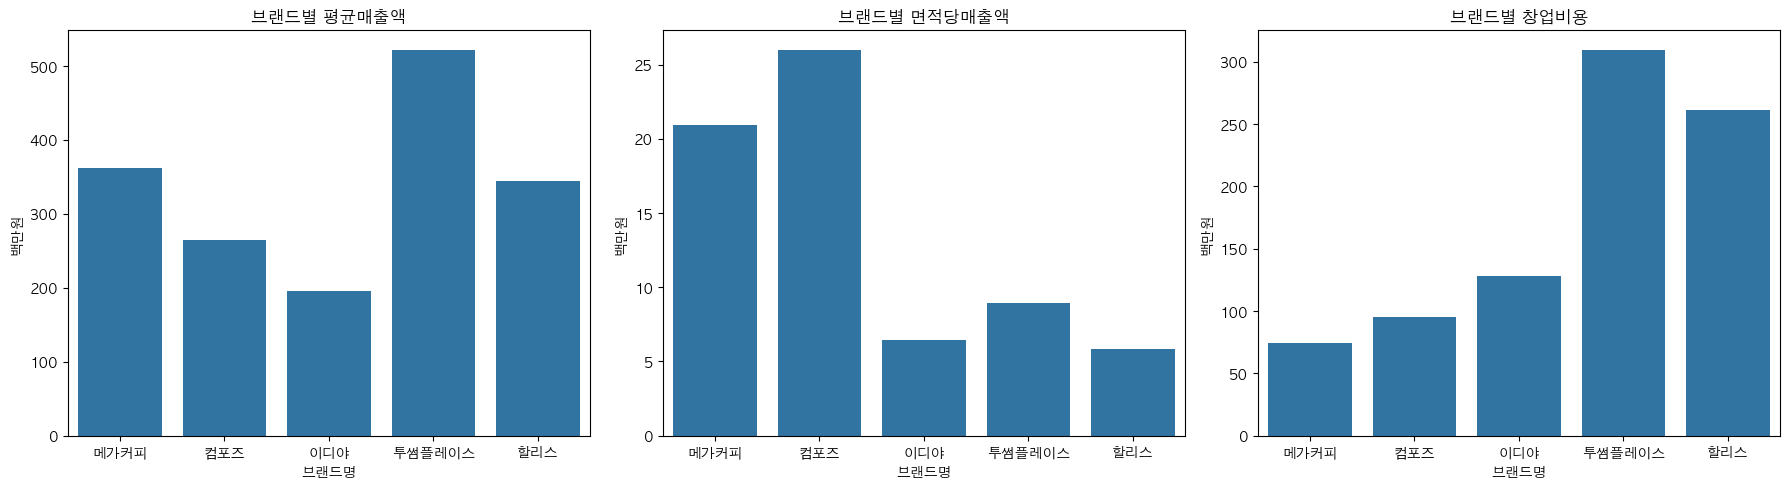

In [12]:
# 한 화면에 수익성 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 평균매출
sns.barplot(data=profit_df, x='브랜드명', y='평균매출액(백만원)', ax=axs[0])
axs[0].set_title('브랜드별 평균매출액')
axs[0].set_ylabel('백만원')

# 면적당매출
sns.barplot(data=profit_df, x='브랜드명', y='면적당평균매출액(백만원)', ax=axs[1])
axs[1].set_title('브랜드별 면적당매출액')
axs[1].set_ylabel('백만원')

# 사업자부담금
sns.barplot(data=profit_df, x='브랜드명', y='사업자부담금(백만원)', ax=axs[2])
axs[2].set_title('브랜드별 창업비용')
axs[2].set_ylabel('백만원')

plt.tight_layout()
plt.show()

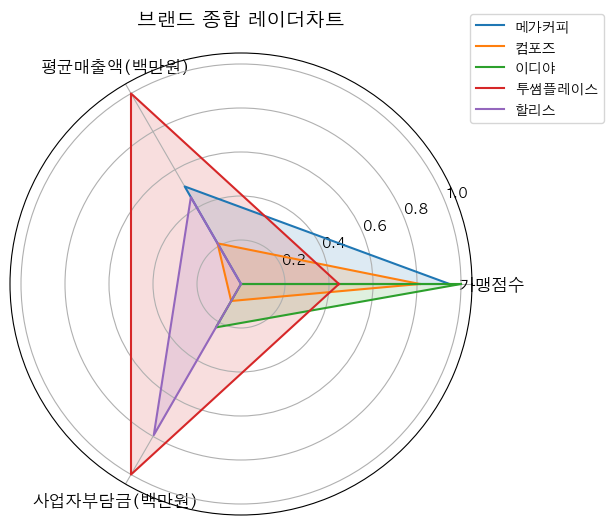

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 사용할 변수만 선택 (평균매출액 제외하고 추가)
selected_cols = ['가맹점수', '평균매출액(백만원)', '사업자부담금(백만원)']

# 필요한 데이터만 추출
radar_df = df[['브랜드명'] + selected_cols]
radar_df = radar_df.set_index('브랜드명')

# 표준화 (min-max scaling)
normalized = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

# 레이더차트 기본 세팅
labels = normalized.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 6))

# 브랜드별로 그리기
for brand in normalized.index:
    values = normalized.loc[brand].tolist()
    values += values[:1]  # 폐곡선
    plt.polar(angles, values, label=brand)
    plt.fill(angles, values, alpha=0.15)

plt.xticks(angles[:-1], labels, fontsize=12)
plt.title('브랜드 종합 레이더차트', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [14]:
import pandas as pd
from collections import Counter

# 키워드 리스트
positive_keywords = ["맛있", "친절", "좋", "깔끔", "추천", "저렴", "훌륭", "빠르", "감사", "넓"]
negative_keywords = ['비호', '굳이', '불쾌', '실망', '없', '별로', '이상', '더워요', '밍밍', '덥', '불친절', '복잡', '좁', '썩은', '노답', ';', '아쉽', '작', '모르', '부족', '매너', '오래', '거절', '패스', '교체', '불편', '이물질', '잘못', '비싸', '느리', '귀찮', '시급', '적다', '나빠', '최악', '어이','시원찮음']

# 감성 분석 함수
def analyze_sentiment_korean(text):
    pos = sum(1 for word in positive_keywords if word in text)
    neg = sum(1 for word in negative_keywords if word in text)

    if pos > neg:
        return "positive"
    elif neg > pos:
        return "negative"
    else:
        return "neutral"

# 브랜드별 파일 경로
brand_files = {
    "메가커피": {
        "메가커피_강남로데오점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/메가커피_강남로데오점.xlsx",
        "메가커피_강남중앙점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/메가커피_강남중앙점.xlsx"
    },
    "컴포즈": {
        "컴포즈_강남역사점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/컴포즈_강남역사점.xlsx",
        "컴포즈_강남역센트럴애비뉴점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/컴포즈_강남역센트럴애비뉴점.xlsx"
    },
    "이디야": {
        "이디야커피_신논현역점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/이디야커피_신논현역점.xlsx",
        "이디야커피_역삼역점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/이디야커피_역삼역점.xlsx",
        "이디야커피_역삼플래티넘점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/이디야커피_역삼플래티넘점.xlsx"
    },
    "투썸플레이스": {
        "투썸플레이스_강남KI타워점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/투썸플레이스_강남KI타워점.xlsx",
        "투썸플레이스_강남역중앙점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/투썸플레이스_강남역중앙점.xlsx"
    },
    "할리스": {
        "할리스_강남역2": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/할리스 강남역2.xlsx",
        "할리스_강남역점": r"/Users/hansujeong/Desktop/파이썬데이터 분석_팀플/reivew/할리스 강남역점.xlsx"
    }
}

# 결과 저장용 딕셔너리
brand_results = {}

# 브랜드 단위 분석
for brand, branches in brand_files.items():
    pos_count, neg_count = 0, 0
    all_pos_words, all_neg_words = [], []

    for file_path in branches.values():
        df_emotion = pd.read_excel(file_path, sheet_name="output")

        for _, row in df_emotion.iterrows():
            text = f"{str(row.get('content', ''))} {str(row.get('tag_text', ''))}"
            sentiment = analyze_sentiment_korean(text)

            if sentiment == "positive":
                pos_count += 1
                matched = [w for w in positive_keywords if w in text]
                all_pos_words.extend(matched)
            elif sentiment == "negative":
                neg_count += 1
                matched = [w for w in negative_keywords if w in text]
                all_neg_words.extend(matched)

    total = pos_count + neg_count
    pos_rate = round(pos_count / total * 100, 1) if total else 0
    neg_rate = round(neg_count / total * 100, 1) if total else 0

    brand_results[brand] = {
        "긍정 비율(%)": pos_rate,
        "부정 비율(%)": neg_rate,
        "긍정 키워드 상위 5개": [w for w, _ in Counter(all_pos_words).most_common(5)],
        "부정 키워드 상위 5개": [w for w, _ in Counter(all_neg_words).most_common(5)]
    }

# 결과 출력
for brand, res in brand_results.items():
    print(f"\n🏢 {brand}")
    print(f" - 긍정 비율: {res['긍정 비율(%)']}%")
    print(f" - 부정 비율: {res['부정 비율(%)']}%")
    print(f" - 대표 긍정 키워드: {res['긍정 키워드 상위 5개']}")
    print(f" - 대표 부정 키워드: {res['부정 키워드 상위 5개']}")


🏢 메가커피
 - 긍정 비율: 97.9%
 - 부정 비율: 2.1%
 - 대표 긍정 키워드: ['맛있', '좋', '친절', '빠르', '저렴']
 - 대표 부정 키워드: ['없', ';', '불쾌', '실망', '좁']

🏢 컴포즈
 - 긍정 비율: 95.9%
 - 부정 비율: 4.1%
 - 대표 긍정 키워드: ['맛있', '좋', '친절', '빠르', '저렴']
 - 대표 부정 키워드: ['없', '불친절', '모르', '최악', '굳이']

🏢 이디야
 - 긍정 비율: 97.5%
 - 부정 비율: 2.5%
 - 대표 긍정 키워드: ['맛있', '좋', '친절', '넓', '빠르']
 - 대표 부정 키워드: ['없', '실망', ';', '오래', '별로']

🏢 투썸플레이스
 - 긍정 비율: 97.3%
 - 부정 비율: 2.7%
 - 대표 긍정 키워드: ['맛있', '좋', '넓', '친절', '깔끔']
 - 대표 부정 키워드: ['없', '불친절', '불쾌', '좁', '매너']

🏢 할리스
 - 긍정 비율: 97.7%
 - 부정 비율: 2.3%
 - 대표 긍정 키워드: ['맛있', '좋', '넓', '친절', '깔끔']
 - 대표 부정 키워드: ['없', '불편', '더워요', '오래', '복잡']


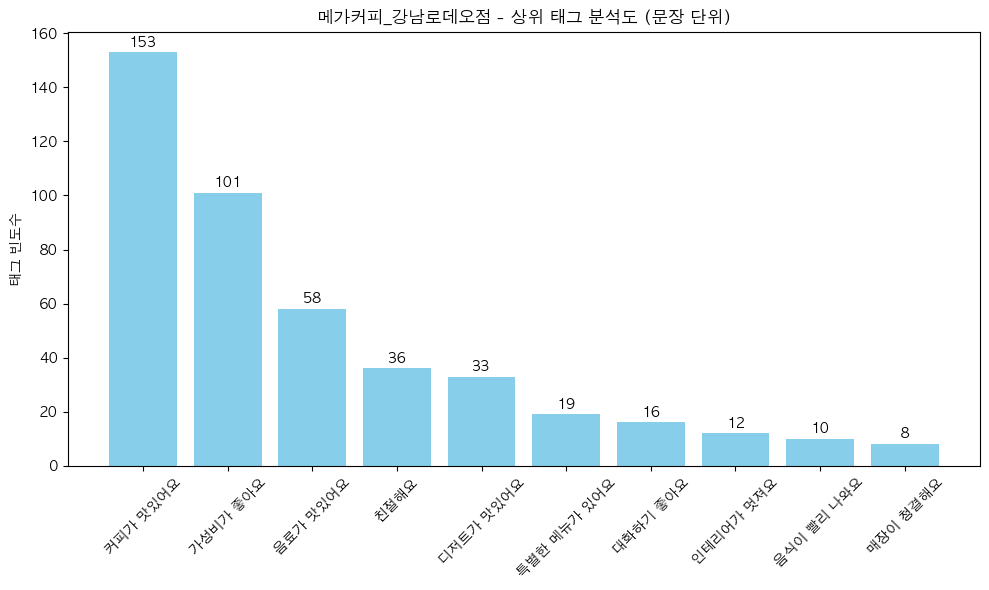

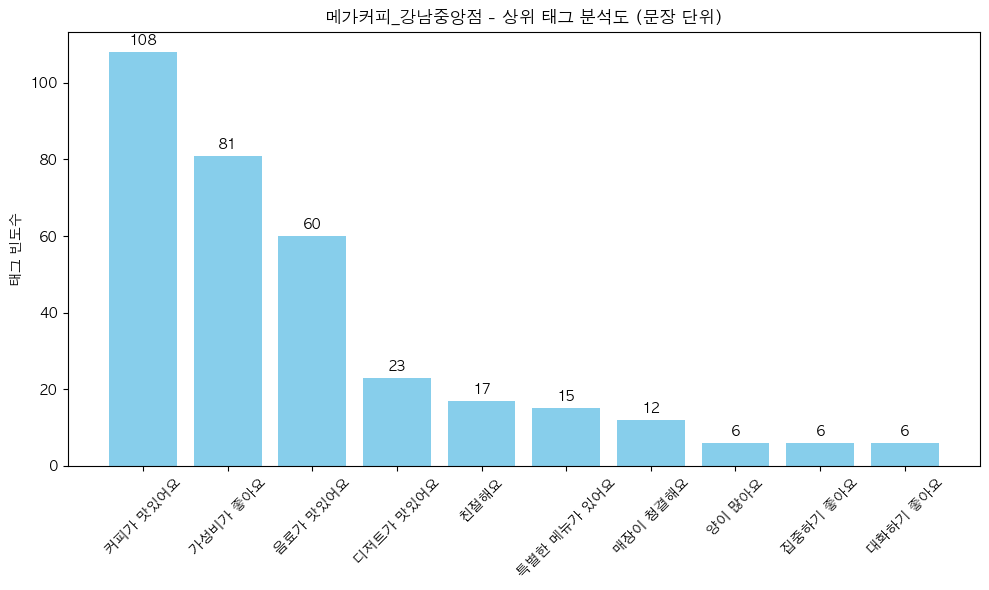

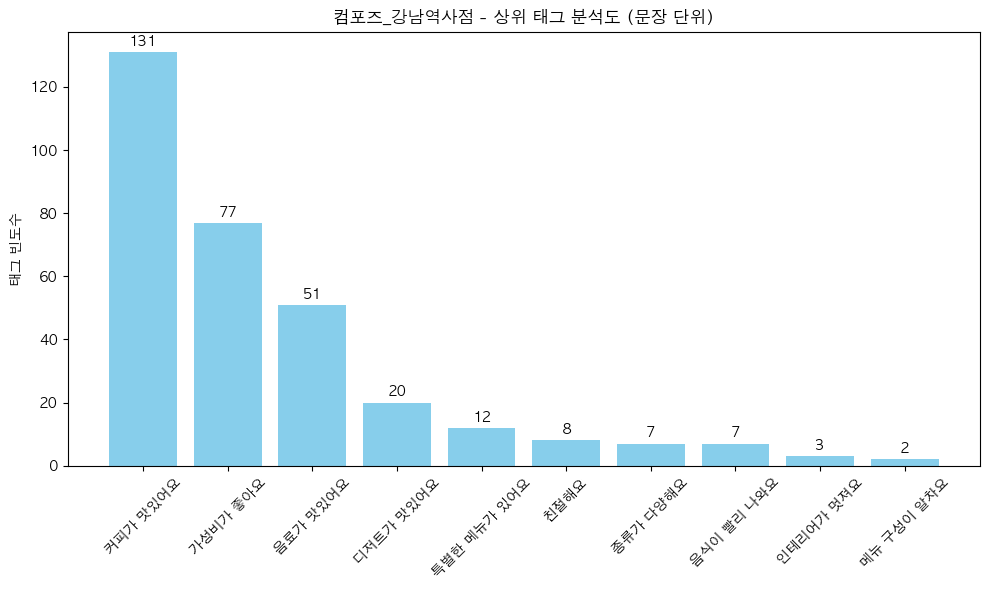

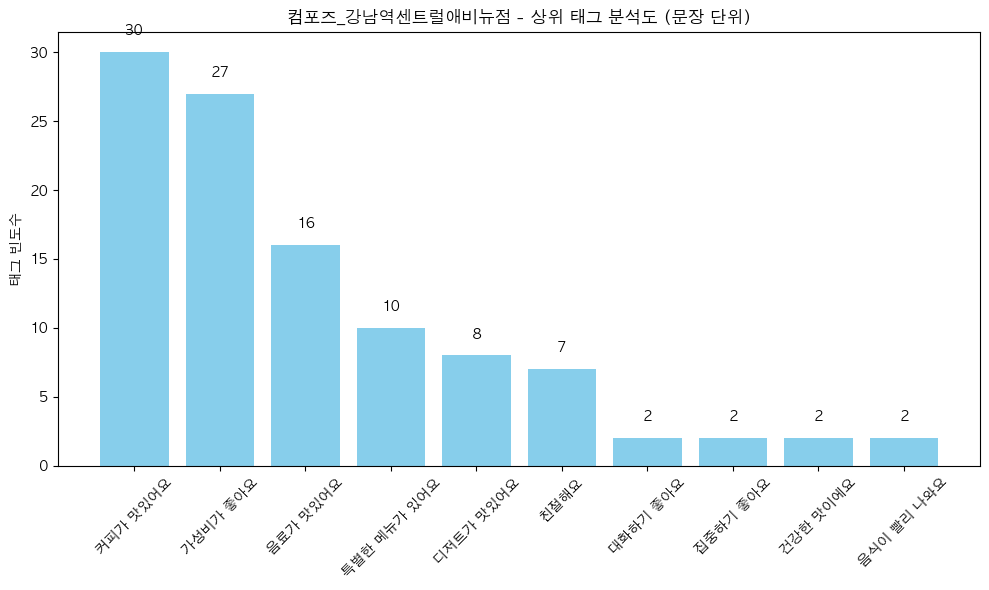

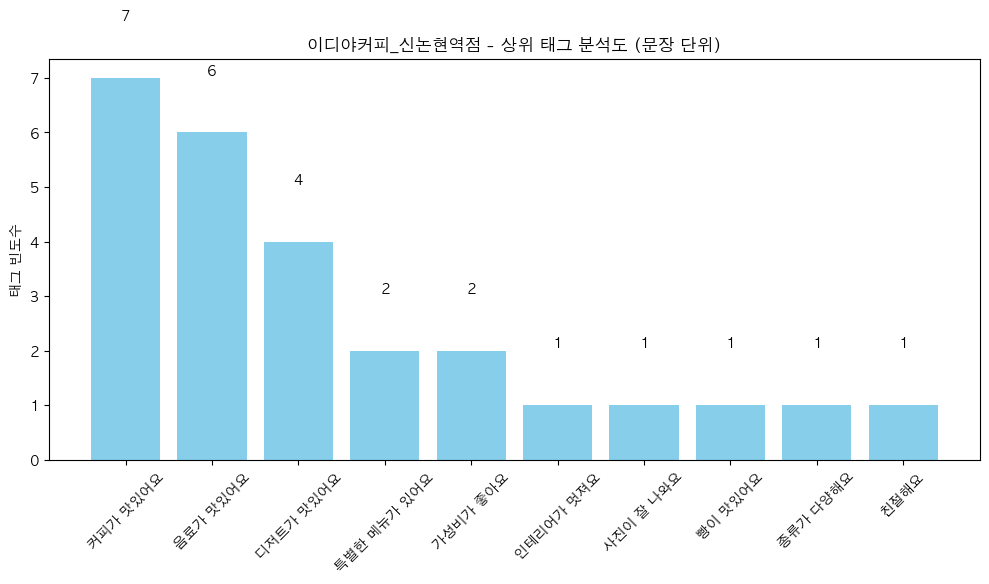

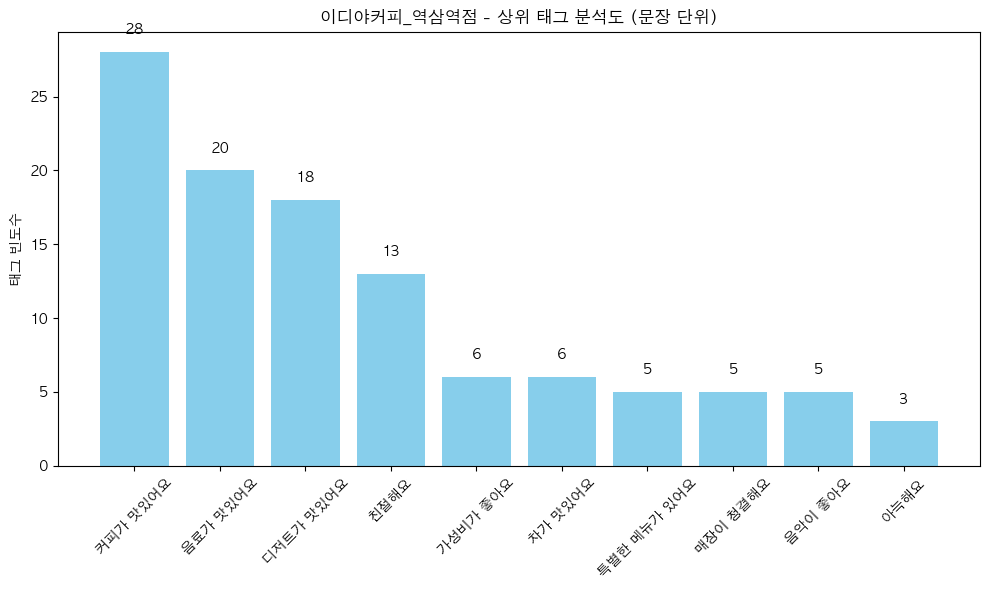

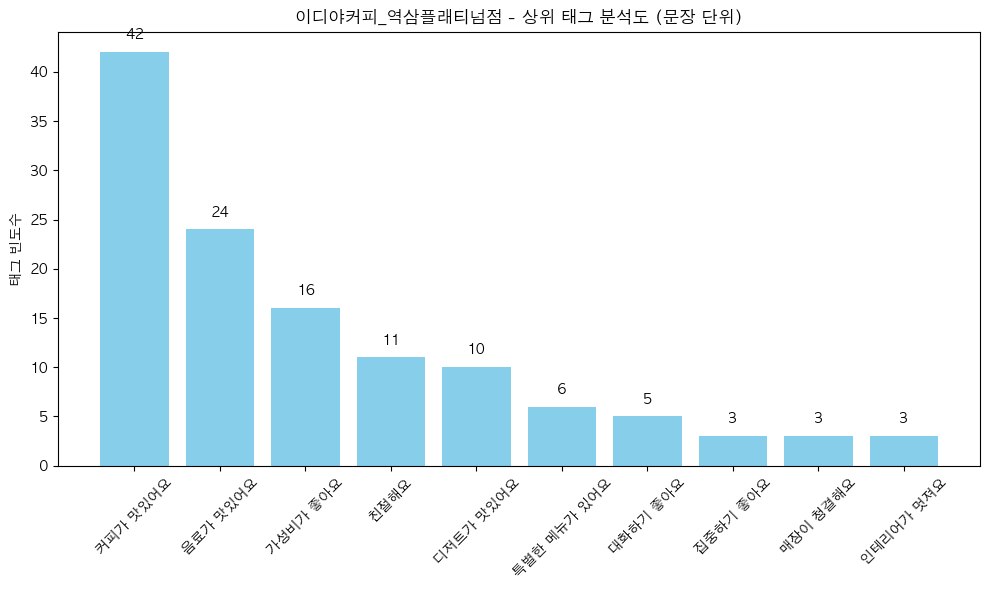

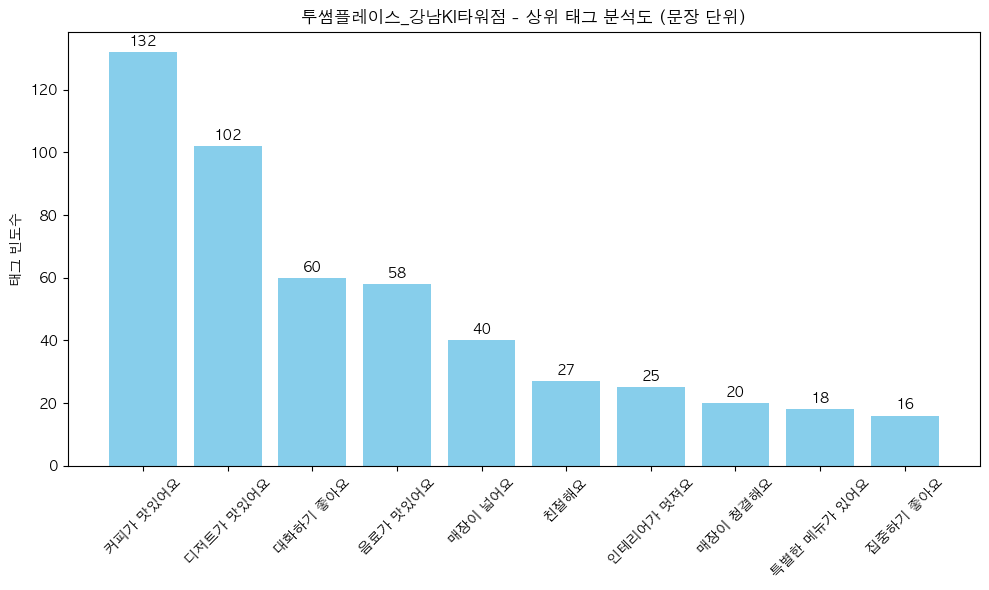

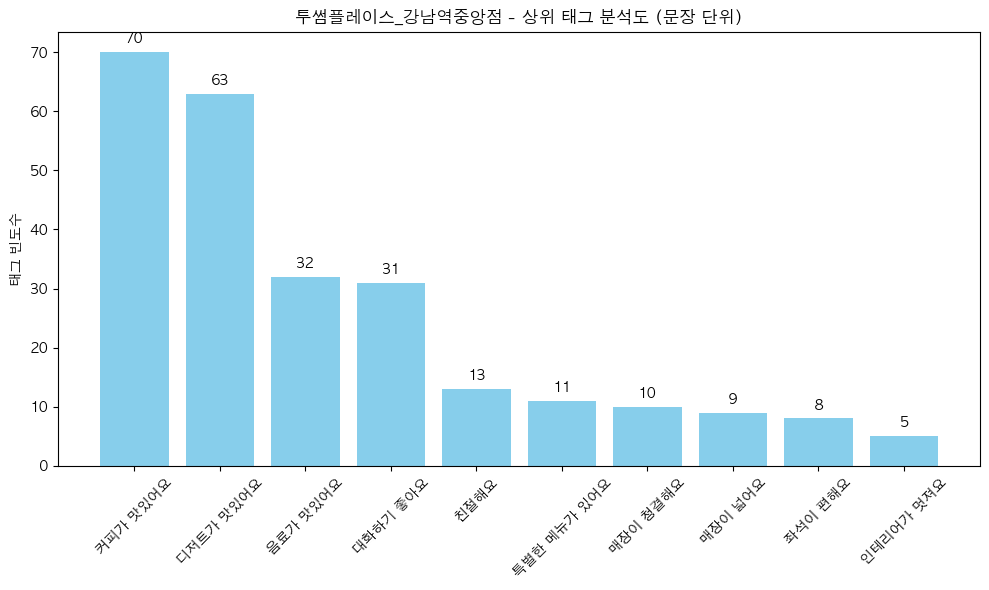

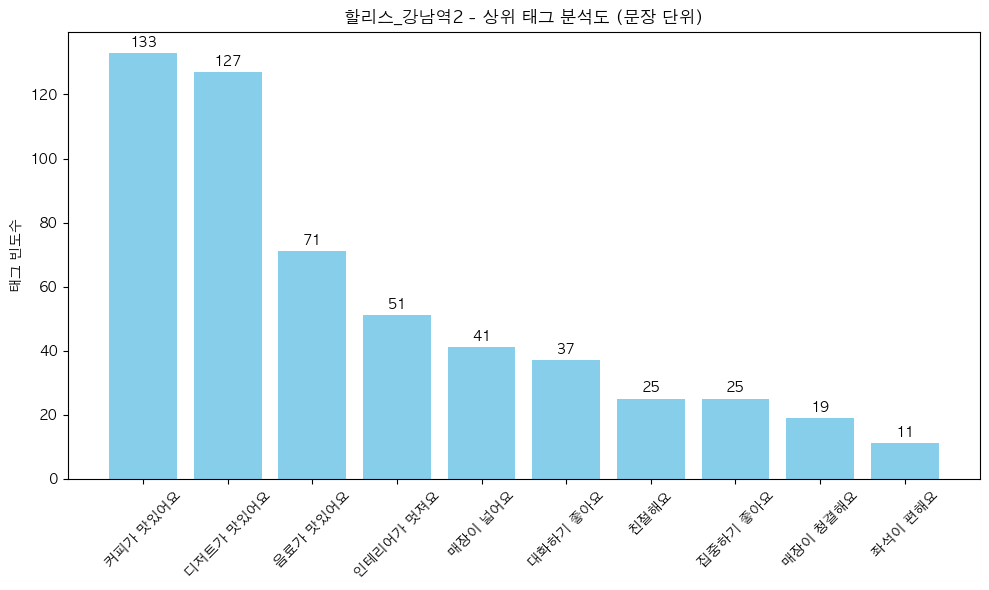

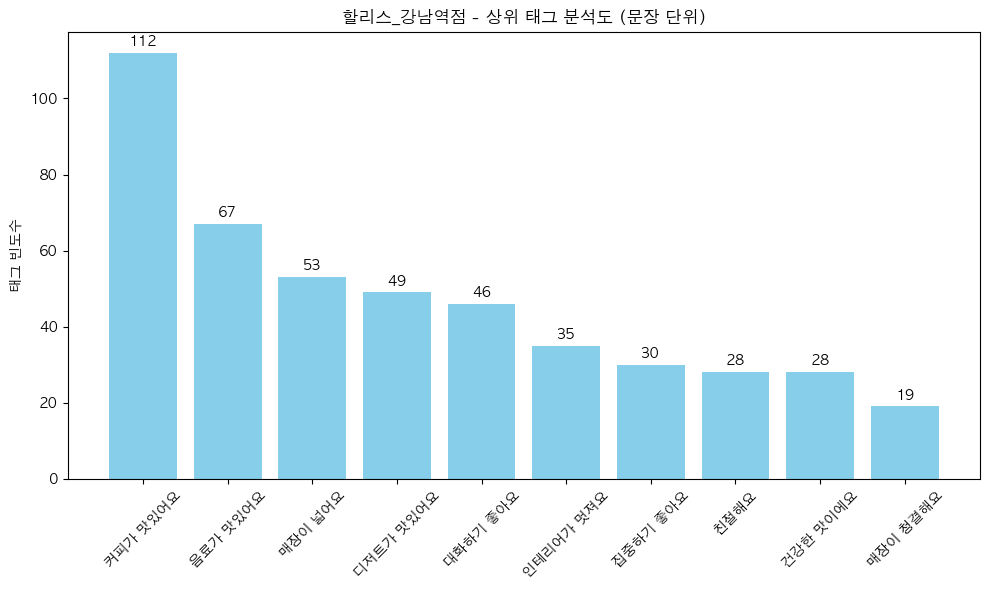

In [17]:
# 문장 단위 분석 및 시각화
for brand, branches in brand_files.items():
    for branch_name, file_path in branches.items():
        df_tag = pd.read_excel(file_path, sheet_name="output")

        all_tags = []
        for tags in df_tag["tag_text"].dropna():
            # 쉼표로 문장 단위 분리하고 양쪽 공백 제거
            sentence_list = [s.strip() for s in str(tags).split(',') if s.strip()]
            all_tags.extend(sentence_list)

            tag_counts = Counter(all_tags).most_common(10)

        if not tag_counts:
            print(f"⚠️ {branch_name}에 태그 없음")
            continue

        # 빈도수 상위 10개 태그 추출
        tag_counts = Counter(all_tags).most_common(10)
        tags, counts = zip(*tag_counts)
        
        # 시각화
        plt.figure(figsize=(10, 6))
        bars = plt.bar(tags, counts, color='skyblue')
        plt.title(f"{branch_name} - 상위 태그 분석도 (문장 단위)")
        plt.ylabel("태그 빈도수")
        plt.xticks(rotation=45)

        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}",
                     ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()


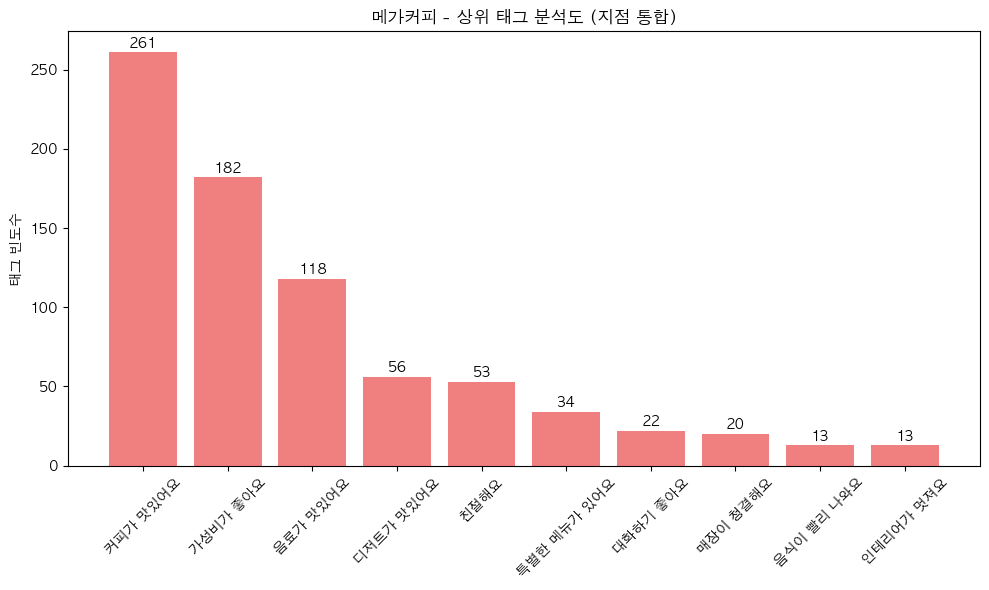

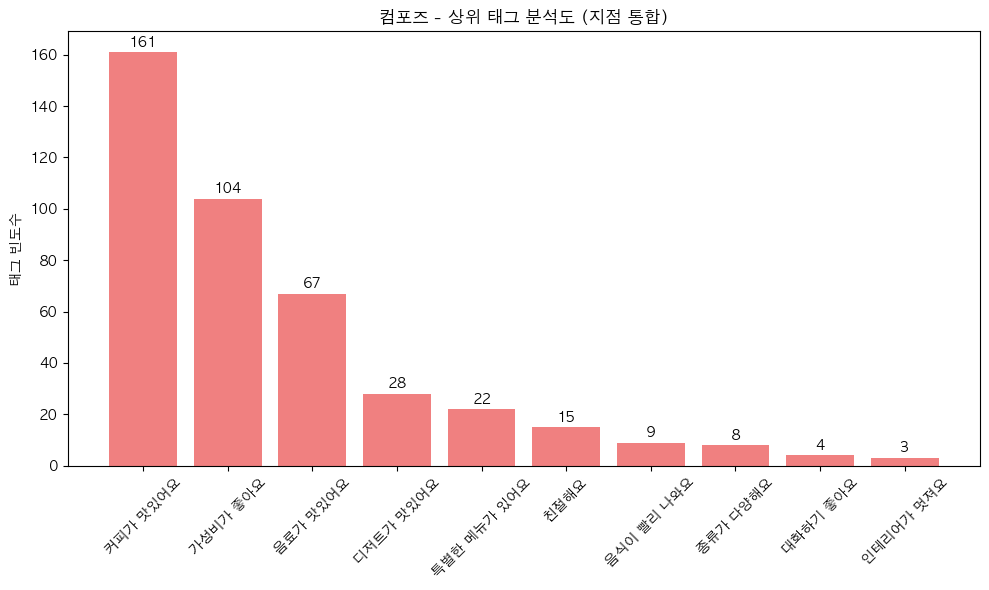

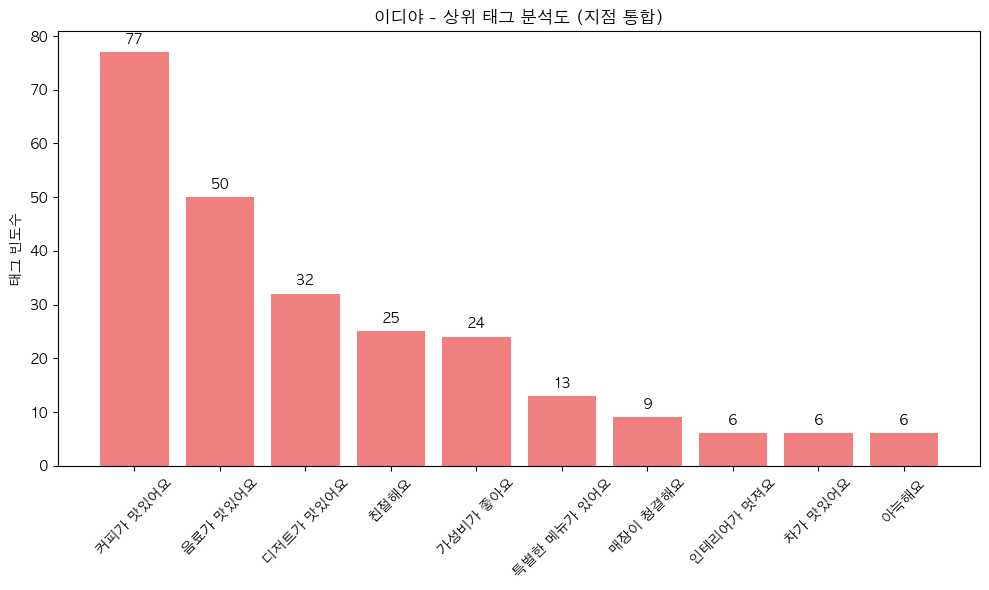

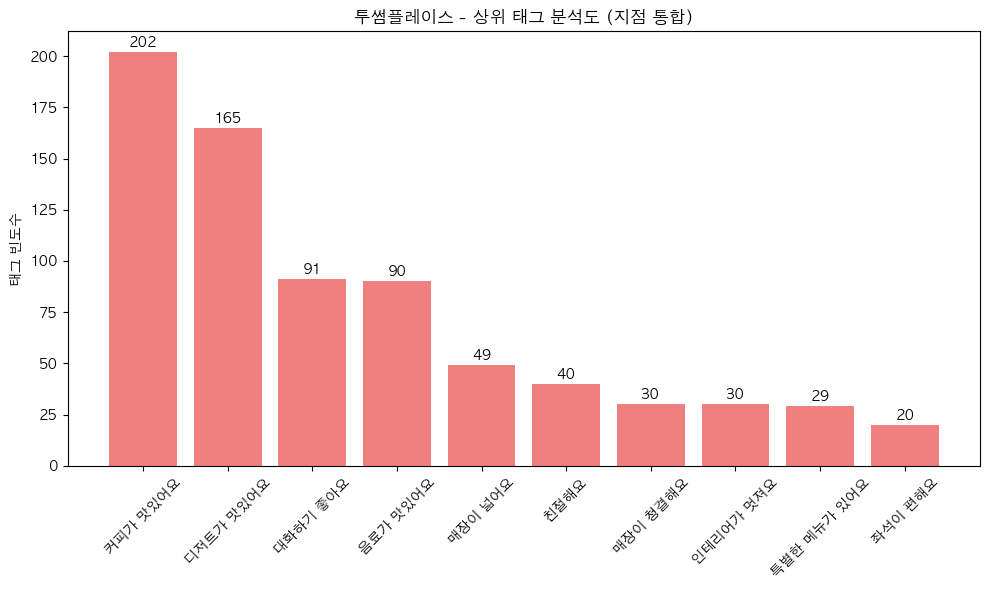

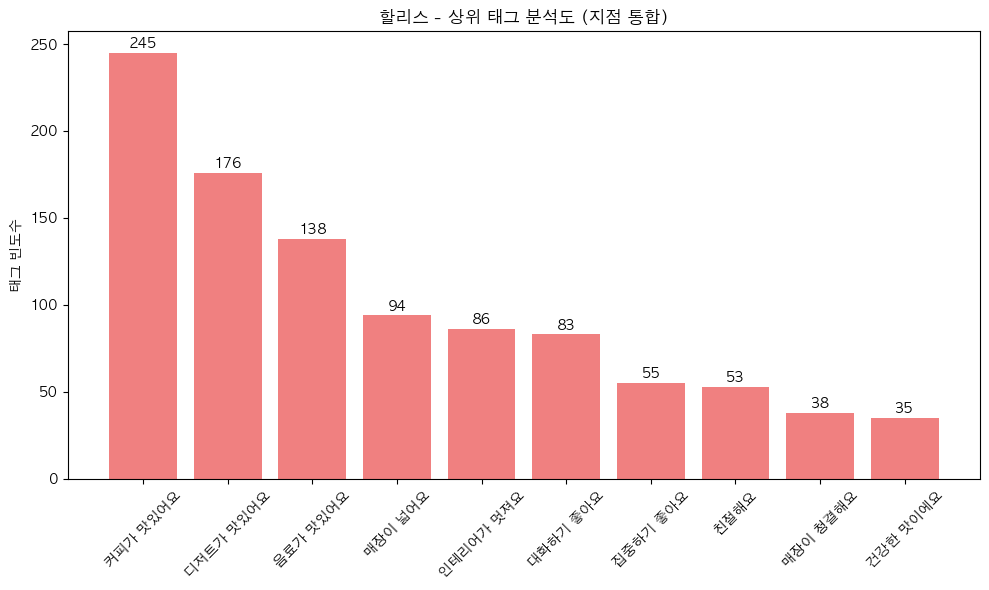

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd


# 브랜드별 태그 수집 및 시각화
for brand, branches in brand_files.items():
    brand_tags = []

    for branch_name, file_path in branches.items():
        df_tag = pd.read_excel(file_path, sheet_name="output")

        for tags in df_tag["tag_text"].dropna():
            sentence_list = [s.strip() for s in str(tags).split(',') if s.strip()]
            brand_tags.extend(sentence_list)

    if not brand_tags:
        print(f"⚠️ {brand}에 태그 없음")
        continue

    tag_counts = Counter(brand_tags).most_common(10)
    tags, counts = zip(*tag_counts)

    # 시각화
    plt.figure(figsize=(10, 6))
    bars = plt.bar(tags, counts, color='lightcoral')
    plt.title(f"{brand} - 상위 태그 분석도 (지점 통합)")
    plt.ylabel("태그 빈도수")
    plt.xticks(rotation=45)

    # 막대 위에 수치 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}",
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

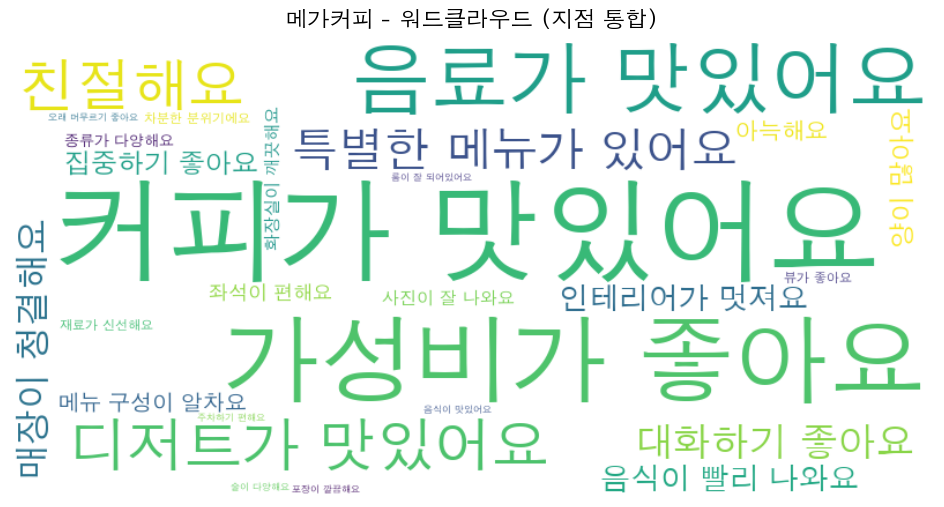

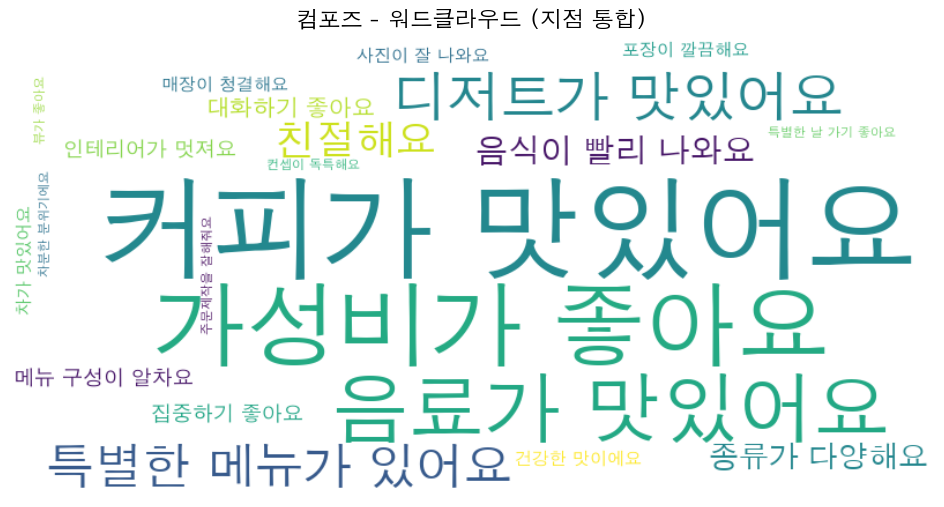

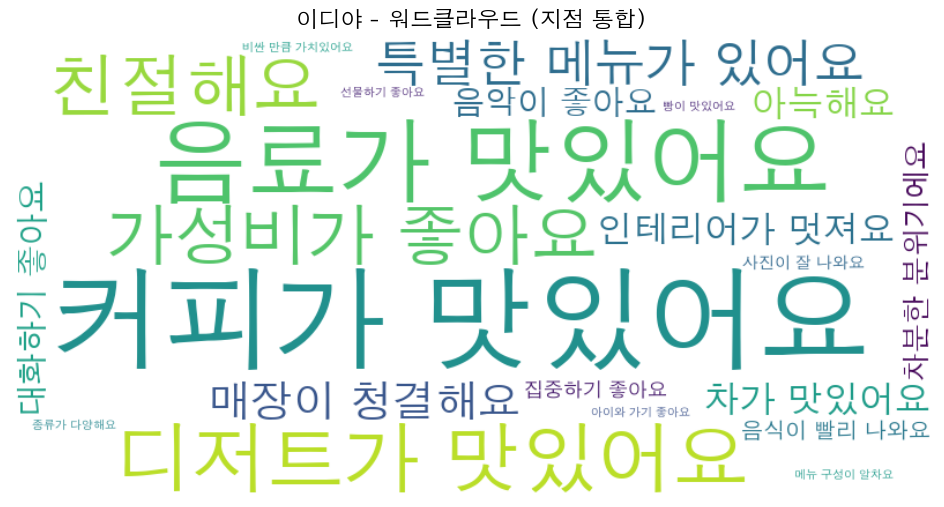

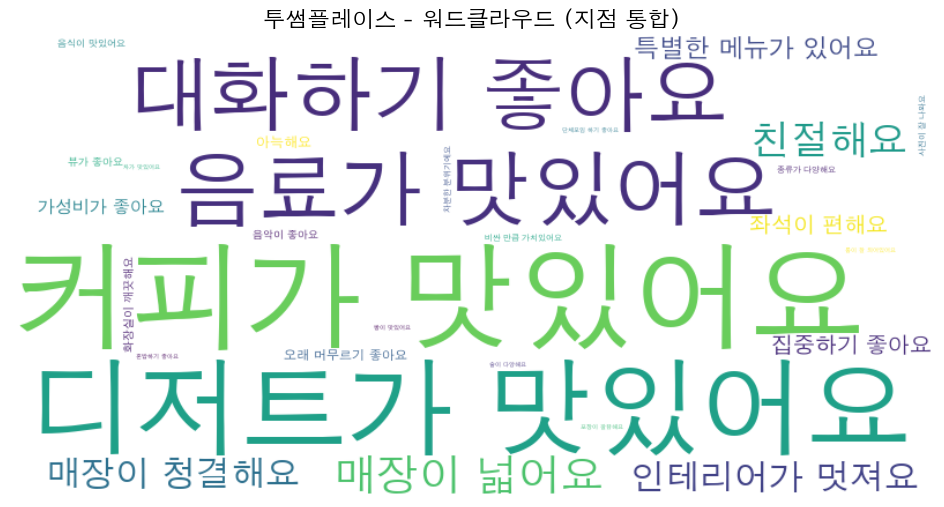

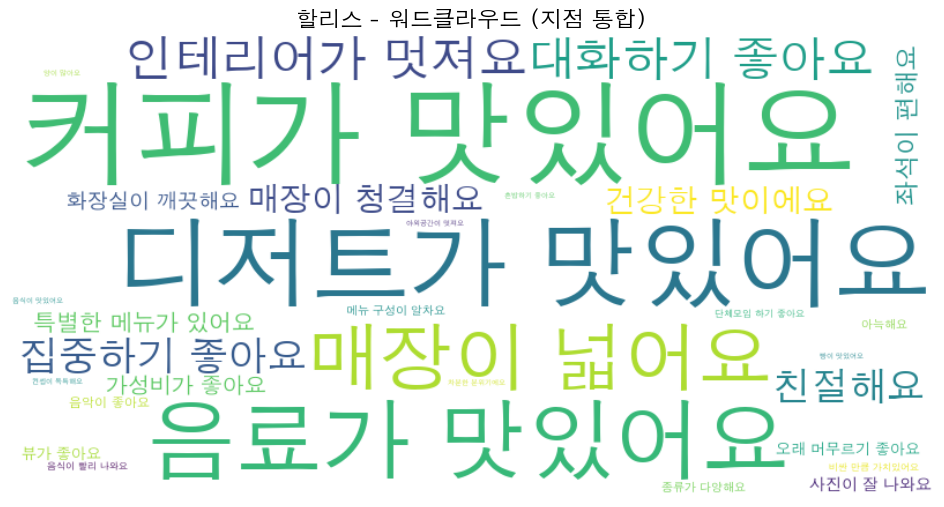

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

for brand, branches in brand_files.items():
    brand_tags = []

    for branch_name, file_path in branches.items():
        df_tag = pd.read_excel(file_path, sheet_name="output")

        for tags in df_tag["tag_text"].dropna():
            sentence_list = [s.strip() for s in str(tags).split(',') if s.strip()]
            brand_tags.extend(sentence_list)

    if not brand_tags:
        print(f"⚠️ {brand}에 태그 없음")
        continue

    tag_counts = Counter(brand_tags)

    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', 
        width=800,
        height=400,
        background_color='white',
        max_words=100
    ).generate_from_frequencies(tag_counts)

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{brand} - 워드클라우드 (지점 통합)", fontsize=16)
    plt.show()


In [ ]:
data = []
for brand, stats in brand_results.items():
    data.append({
        '브랜드명': brand,
        '긍정비율(%)': stats['긍정 비율(%)'],
        '부정비율(%)': stats['부정 비율(%)']
    })
df_sentiment = pd.DataFrame(data)

df = df.merge(df_sentiment, on='브랜드명')

df['매우우수비율(%)'] = np.where(
    df['가맹점수'] != 0,
    (df['위생등급매우우수개수'] / df['가맹점수'] * 100).round(1),
    np.nan
)
df.head()

,브랜드명,가맹점수,평균매출액(백만원),면적당평균매출액(백만원),사업자부담금(백만원),면적당인테리어비용(백만원),팔로워(만명),위생등급매우우수개수,위생등급우수개수,위생등급좋음개수,위생등급총개수,긍정비율(%),부정비율(%),매우우수비율(%)
0,메가커피,2681.0,362.621,20.908,74.226,1.540,4.7,82,13,2,97,97.9,2.1,3.1
1,컴포즈,2360.0,265.013,26.002,95.232,1.600,12.3,136,20,1,157,95.9,4.1,5.8
2,이디야,2805.0,195.287,6.447,127.890,2.090,21.4,1716,145,26,1887,97.5,2.5,61.2
3,투썸플레이스,1484.0,522.117,8.949,309.800,2.187,32.7,862,12,2,876,97.3,2.7,58.1
4,할리스,424.0,344.268,5.849,261.000,2.000,6.5,318,3,1,322,97.7,2.3,75.0


                    가맹점수  평균매출액(백만원)  면적당평균매출액(백만원)  사업자부담금(백만원)  \
가맹점수            1.000000   -0.468360       0.497627    -0.811494   
평균매출액(백만원)     -0.468360    1.000000      -0.134621     0.685719   
면적당평균매출액(백만원)   0.497627   -0.134621       1.000000    -0.691034   
사업자부담금(백만원)    -0.811494    0.685719      -0.691034     1.000000   
면적당인테리어비용(백만원) -0.434193    0.272458      -0.904176     0.794302   
팔로워(만명)         0.033622    0.392592      -0.399707     0.534464   
매우우수비율(%)      -0.630896    0.127984      -0.967493     0.769528   
긍정비율(%)        -0.181753    0.233655      -0.598829     0.227582   

                면적당인테리어비용(백만원)   팔로워(만명)  매우우수비율(%)   긍정비율(%)  
가맹점수                 -0.434193  0.033622  -0.630896 -0.181753  
평균매출액(백만원)            0.272458  0.392592   0.127984  0.233655  
면적당평균매출액(백만원)        -0.904176 -0.399707  -0.967493 -0.598829  
사업자부담금(백만원)           0.794302  0.534464   0.769528  0.227582  
면적당인테리어비용(백만원)        1.000000  0.732371   0.916354  0.298624  
팔로워

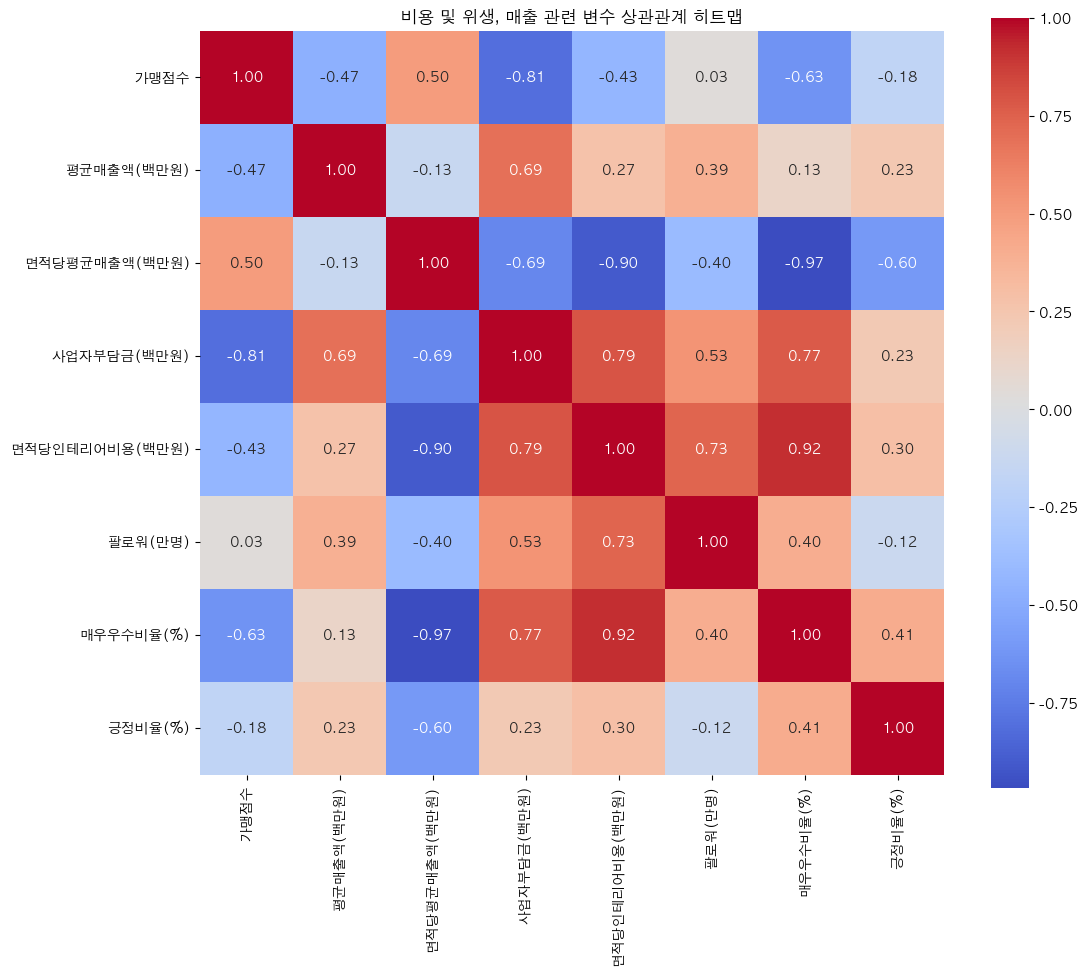

In [ ]:
analysis_cols = ['가맹점수', '평균매출액(백만원)', '면적당평균매출액(백만원)', '사업자부담금(백만원)',
       '면적당인테리어비용(백만원)', '팔로워(만명)', '매우우수비율(%)', '긍정비율(%)']

# 결측치 제거
analysis_df = df[analysis_cols].dropna()

# 상관계수 분석
correlation_matrix = analysis_df.corr()

# 상관계수 출력
print(correlation_matrix)

# 시각화: 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("비용 및 위생, 매출 관련 변수 상관관계 히트맵")
plt.show()